# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Fetching the datasets

In [2]:
# fetching dataset - 1
df1 = pd.read_csv('Car details v3.csv')
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# fetching dataset - 2
df2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Exploratory data analysis

In [4]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (8128, 13)
DF2 Shape:  (4340, 8)


In [5]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas

In [6]:
print(df1.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [7]:
data1 = df1.dropna()
print(data1)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

In [8]:
print(df2.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [9]:
# getting a statistical summary of the datasets
d1 = data1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


'<<< DATASET 2 >>>'

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Segmentation by Fuel Type

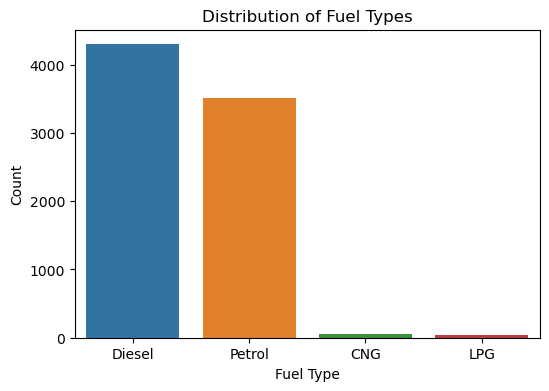

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze the distribution of fuel types
fuel_distribution = data1['fuel'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fuel_distribution.index, y=fuel_distribution.values)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


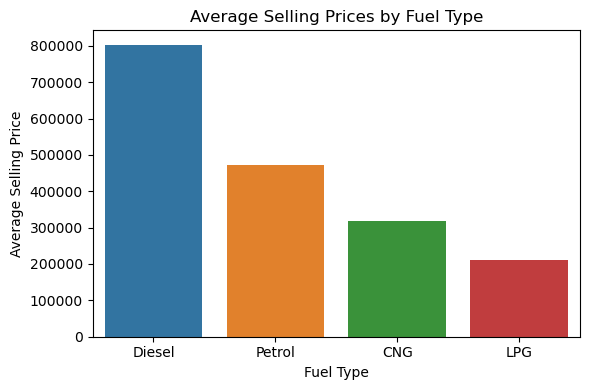

In [11]:
# 2. Compare average selling prices with fuel type
average_prices = data1.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Selling Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')

plt.tight_layout()
plt.show()


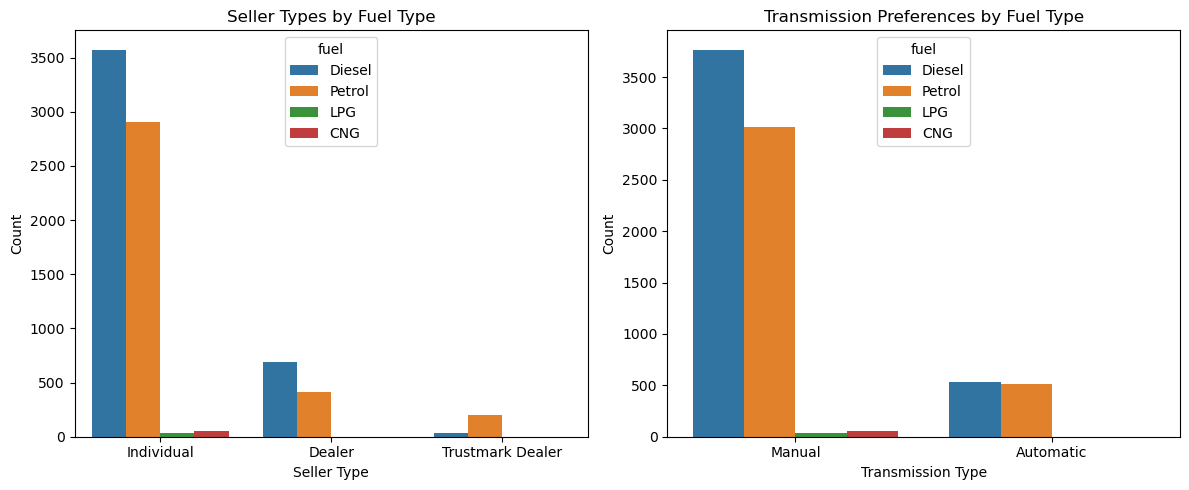

In [12]:
# 3. Explore seller types and transmission preferences within different fuel segments
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='seller_type', hue='fuel', data=data1)
plt.title('Seller Types by Fuel Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='transmission', hue='fuel', data=data1)
plt.title('Transmission Preferences by Fuel Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Segmentation by Transmission Type

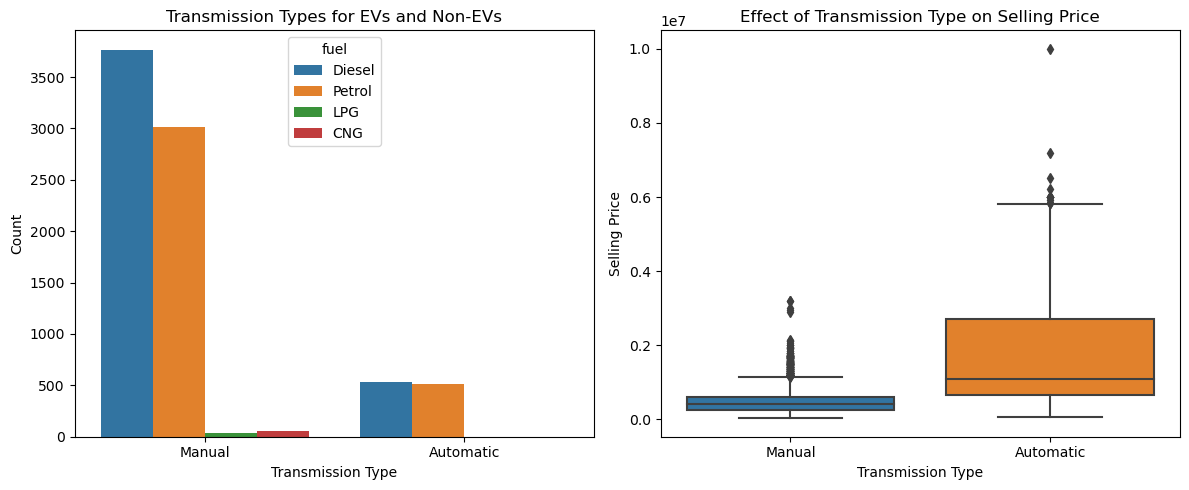

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Compare the distribution of manual and automatic transmissions for EVs and non-EVs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='transmission', hue='fuel', data=data1)
plt.title('Transmission Types for EVs and Non-EVs')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

# 2. Analyze how the transmission type affects the selling price
plt.subplot(1, 2, 2)
sns.boxplot(x='transmission', y='selling_price', data=data1)
plt.title('Effect of Transmission Type on Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

# Market Trends Over Time

C:\Users\HARITHA\AppData\Local\Temp\ipykernel_24160\3281659825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year'] = pd.to_datetime(data1['year'], format='%Y')


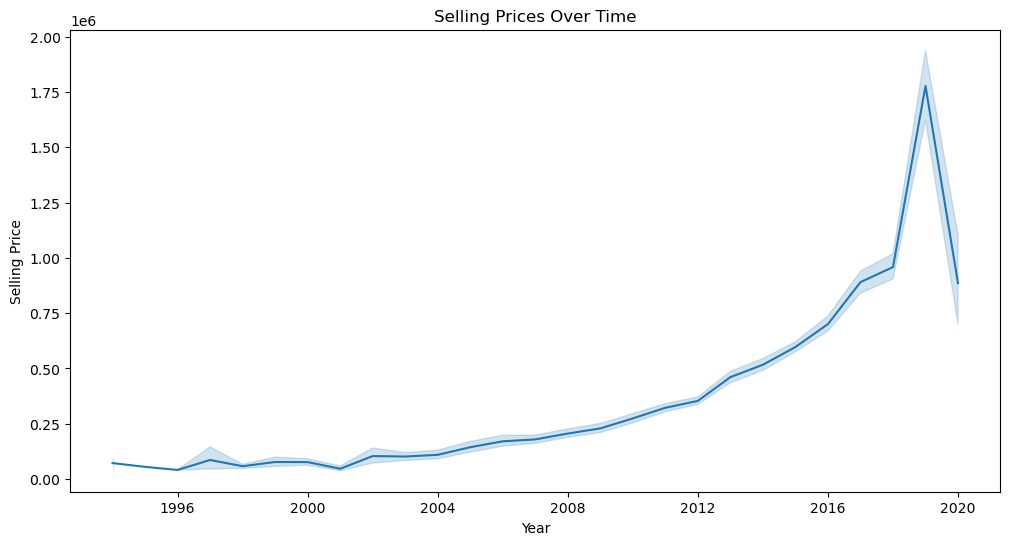

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'year' column to datetime format
data1['year'] = pd.to_datetime(data1['year'], format='%Y')

# Line plot for selling prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='selling_price', data=data1)
plt.title('Selling Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Market Positioning 

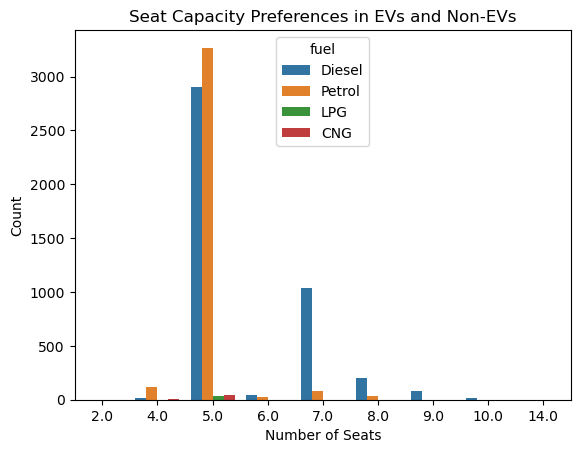

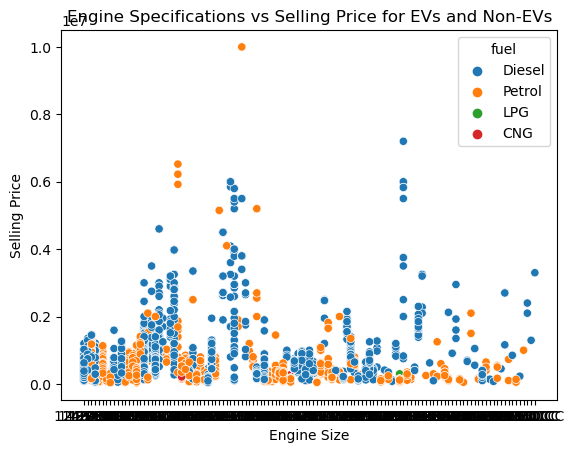

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seat Capacity Analysis
# Plotting preferences for seat capacity in EVs and non-EVs
sns.countplot(x='seats', hue='fuel', data=data1)
plt.title('Seat Capacity Preferences in EVs and Non-EVs')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.show()

# 2. Engine Analysis
# Investigate the impact of engine specifications on EV sales
sns.scatterplot(x='engine', y='selling_price', hue='fuel', data=data1)
plt.title('Engine Specifications vs Selling Price for EVs and Non-EVs')
plt.xlabel('Engine Size')
plt.ylabel('Selling Price')
plt.show()

# Model building using k-means clustering

In [16]:
# selecting features for building a model
selected_features = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
X = data1[selected_features]

In [17]:
# feature scaling
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Handle missing values if any
X_numeric_cleaned = X_numeric.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric_cleaned)

In [18]:
# applying Principle Component Analysis(PCA)
from sklearn.decomposition import PCA

# Specify the number of components based on the number of features
n_components = min(X_numeric_cleaned.shape[0], X_numeric_cleaned.shape[1])

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
columns_pca = [f'PC{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=columns_pca)

# Concatenate the original DataFrame with the PCA components
X_with_pca = pd.concat([X_numeric_cleaned.reset_index(drop=True), X_pca_df], axis=1)

# Print the DataFrame with PCA components
print(X_with_pca.head())

   selling_price  km_driven  seats       PC1       PC2       PC3
0         450000     145500    5.0  0.884671 -0.483183  1.019029
1         370000     120000    5.0  0.603769 -0.552148  0.661764
2         158000     140000    5.0  0.984864 -0.739650  0.769237
3         225000     127000    5.0  0.778584 -0.680030  0.654867
4         130000     120000    5.0  0.744215 -0.763187  0.510873


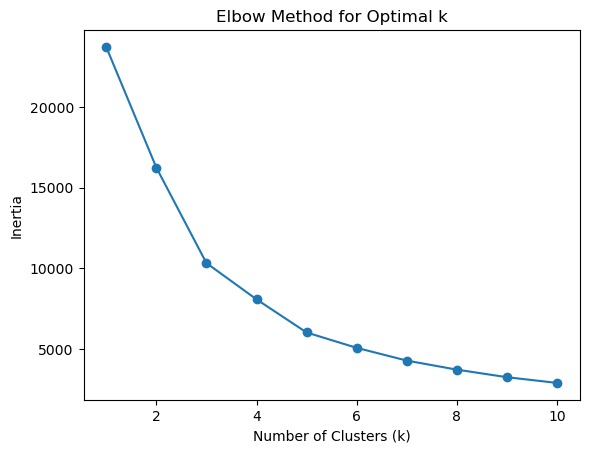

In [19]:
# plotting the results of Elbow
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Elbow method to find the optimal number of clusters (k)
inertia_values = []
possible_k_values = range(1, 11) 
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [20]:
# training the model using k=3 as rendered by the above plot
k = 5
kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [21]:
# check the labels assigned to each data point
print(kmeans.labels_)

[3 3 3 ... 3 1 1]


In [22]:
# check the size of clusters
pd.Series(kmeans.labels_).value_counts()

1    4012
3    2132
0    1425
2     335
4       2
dtype: int64

In [23]:
# adding a new feature of cluster labels to the dataset 1
data1['clusters'] = kmeans.labels_

C:\Users\HARITHA\AppData\Local\Temp\ipykernel_24160\2568838132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['clusters'] = kmeans.labels_


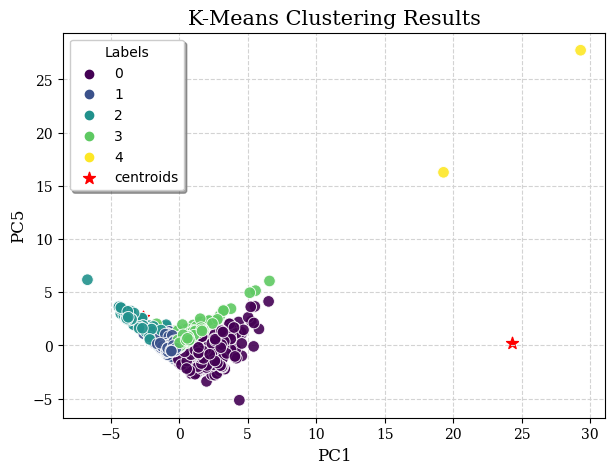

In [25]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=X_with_pca, x='PC1', y='PC3', s=70, hue=kmeans.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC5', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()